In [83]:
import torch
import collections
import matplotlib.pyplot as plt


from model import Model
from torchvision.datasets import Cityscapes
from argparse import ArgumentParser
from torch import nn
from torchvision.transforms import v2

from helpers import *

In [84]:
resizing_factor = 16
batch_size = 5
data_path = './Datasets/CityScapes'
# data loading
transforms = v2.Compose([v2.Resize((1024//resizing_factor,2048//resizing_factor)),v2.ToImage(),v2.ToDtype(torch.float32,scale = True),v2.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
target_transforms = v2.Compose([v2.Resize((1024//resizing_factor,2048//resizing_factor)),v2.ToImage(),v2.ToDtype(torch.float32,scale = True)])
dataset = Cityscapes(data_path, split='train', mode='fine', target_type='semantic',transform = transforms,target_transform=target_transforms)

# train_data = dataset[:int(len(dataset)*0.9)]
# val_data = dataset[int(len(dataset)*0.9):]
train_set,val_set = torch.utils.data.random_split(dataset,[0.01,0.99] ,generator=torch.Generator().manual_seed(1))
trainloader = torch.utils.data.DataLoader(train_set,batch_size = batch_size,shuffle = True)

In [112]:
indices_train = range(0,int(0.8*len(dataset)))
indices_val = range(int(0.8*len(dataset)),len(dataset))
trainset = torch.utils.data.Subset(dataset,indices_train)
valset = torch.utils.data.Subset(dataset,indices_val)
print(len(dataset))
len(trainset)+len(valset)


2975


2975

In [85]:
model = torch.load('fourth_model.pt')

sample = dataset[0]
img, target = sample

output_viz = model.forward(img.view(1,-1,1024//resizing_factor,2048//resizing_factor).cuda())

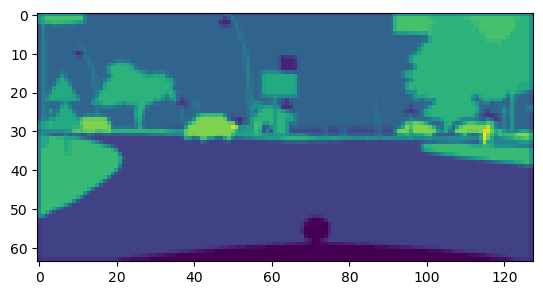

In [86]:
target.size()
plt.imshow(target[0,:,:])

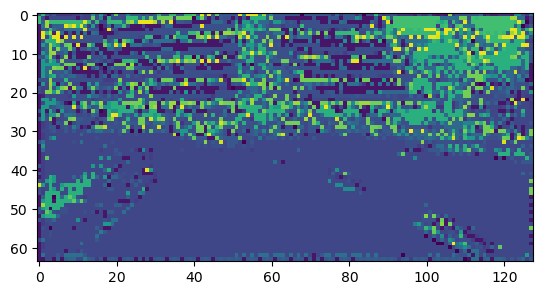

In [87]:
output_viz.size()
output_argmax = torch.argmax(output_viz,dim = 1)
output_argmax.size()
output_argmax = output_argmax.cpu()
plt.imshow(output_argmax[0,:,:])

In [88]:
criterion = nn.CrossEntropyLoss()

In [89]:

for batch, (data,target) in enumerate(trainloader):
    data = data.cuda()
    target = target.cuda()
    output = model.forward(data)
    output_argmax = torch.softmax(output,dim = 1)
    loss = criterion(output_argmax/30,target.long().squeeze()) 
    # loss.backward()
    print(loss)

tensor(3.5262, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(3.5263, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(3.5262, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(3.5262, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(3.5262, device='cuda:0', grad_fn=<NllLoss2DBackward0>)
tensor(3.5262, device='cuda:0', grad_fn=<NllLoss2DBackward0>)


In [79]:
output_argmax.size()

torch.Size([5, 30, 64, 128])

In [90]:
np.unique(target.cpu())


array([0.00392157, 0.00784314, 0.01176471, 0.01568628, 0.01960784,
       0.02352941, 0.02745098, 0.03137255, 0.03529412, 0.03921569,
       0.04313726, 0.04705883, 0.0509804 , 0.05490196, 0.05882353,
       0.0627451 , 0.06666667, 0.07058824, 0.07450981, 0.07843138,
       0.08235294, 0.08627451, 0.09019608, 0.09411766, 0.09803922,
       0.10196079, 0.10588236, 0.10980393, 0.1137255 , 0.11764707,
       0.12156864, 0.1254902 , 0.12941177], dtype=float32)